In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
num_samples = 1000

X = np.random.multivariate_normal(mean=[0, 3],
                                  cov=[[1, 0.5], [0.5, 1]],
                                  size=num_samples
                                  )
Y = np.random.multivariate_normal(mean=[3, 0],
                                  cov=[[1, 0.5], [0.5, 1]],
                                  size=num_samples
                                  )


In [19]:
inputs = np.vstack([X, Y]).astype(np.float32)
labels = np.vstack([np.ones((num_samples, 2), dtype=np.float32),
                    np.zeros((num_samples, 2), dtype=np.float32)])

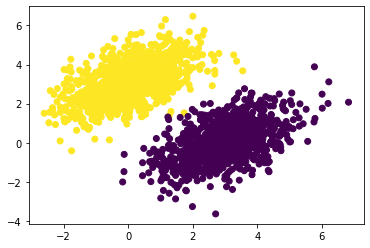

In [20]:
plt.scatter(inputs[:,0], inputs[:,1], c=labels[:, 0])

In [21]:
ip_dim = 2
out_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(ip_dim, out_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(out_dim,)))

In [22]:
def model(x):
    return tf.matmul(x, W) + b

In [23]:
def square_loss(y_true, y_preds):
    sq = tf.square(y_true - y_preds)
    return tf.reduce_mean(sq)

In [24]:
lr = 0.1

def training_step(ips, trgs):
    with tf.GradientTape() as tape:
        preds = model(ips)
        loss = square_loss(trgs, preds)
    grads_W, grads_b = tape.gradient(loss, [W, b])
    W.assign_sub(grads_W * lr)
    b.assign_sub(grads_b * lr)
    return loss

In [25]:
for step in range(50):
    loss = training_step(inputs, labels)
    if step % 10 ==0:
        print(f'Epoch:{step} - loss {loss:.3f}')

Epoch:0 - loss 2.251
Epoch:10 - loss 0.059
Epoch:20 - loss 0.038
Epoch:30 - loss 0.030
Epoch:40 - loss 0.027


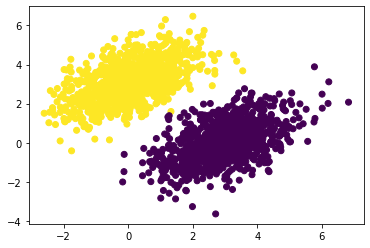

In [26]:
preds = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=preds[:, 0] > 0.5)

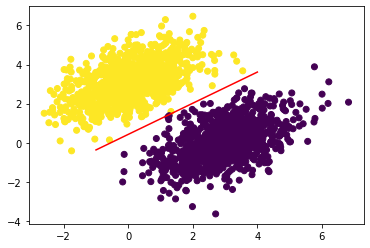

In [27]:
# plot a line
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 -b ) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=preds[:, 0] > 0.5)